In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/faulty-steel-plates/faults.csv


In [2]:
train = pd.read_csv('/kaggle/input/faulty-steel-plates/faults.csv')
train.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [3]:
train.shape

(1941, 34)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

## No Missing Values

In [5]:
train['Other_Faults'].value_counts()

0    1268
1     673
Name: Other_Faults, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(train.iloc[:,:-1])
df_scaled = pd.DataFrame(df_scaled,columns = train.columns[:-1])
df_scaled.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps
0,-1.016481,-1.141639,-0.777729,-0.777729,-0.314852,-0.314996,-0.091389,-0.355537,-0.266099,-1.187708,...,0.528872,1.467656,-1.075752,-0.009490,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086
1,0.141894,0.066403,0.500188,0.500171,-0.345623,-0.338242,-0.124225,-0.380574,-0.017079,-0.384975,...,0.130174,1.417530,-0.297824,-0.845759,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086
2,0.495362,0.436253,-0.054546,-0.054566,-0.352784,-0.344883,-0.150024,-0.387261,0.449832,-0.277944,...,-0.325764,1.165103,0.057185,-1.091513,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086
3,0.541467,0.486504,-0.722225,-0.722225,-0.332463,-0.328279,-0.089044,-0.365736,0.449832,-0.224429,...,0.550227,1.519978,-0.171419,-0.189237,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086
4,1.379032,1.382988,-0.649678,-0.649559,0.099692,-0.172201,0.415209,0.079307,-1.480069,-0.224429,...,2.216130,1.698514,-0.456503,1.221636,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086


In [7]:
from sklearn.cluster import KMeans
cluster_range = range(1,15)
cluster_error = []
for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(df_scaled)
    cluster_error.append(model.inertia_)
cluster_df = pd.DataFrame({'cluster_range':cluster_range,'cluster_error':cluster_error})
cluster_df.head(9)


,cluster_range,cluster_error
0,1,64053.000000
1,2,50595.839508
2,3,45552.741490
3,4,41403.068212
4,5,38001.681283
5,6,35221.486145
6,7,33334.972026
7,8,31432.812863
8,9,29751.326969


Text(0, 0.5, 'error')

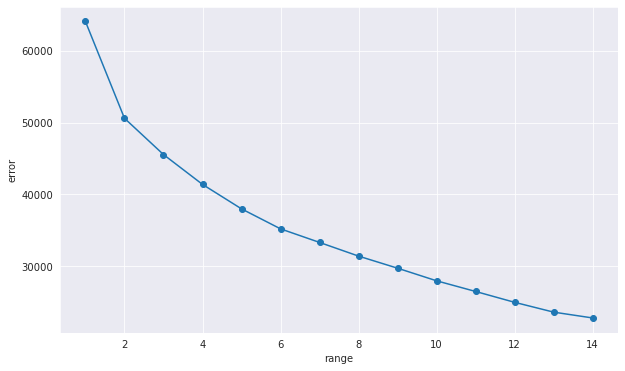

In [8]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range,cluster_error,marker = 'o')
plt.xlabel('range')
plt.ylabel('error')

### Taking no. of clusters as 2

In [9]:
kmeans = KMeans(n_clusters=2,n_init=15,random_state=0)
kmeans.fit(df_scaled)
df_k = df_scaled.copy(deep = True)
df_k['labels'] = kmeans.labels_

In [10]:
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns = df_scaled.columns)
centroids

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps
0,0.219358,0.169032,-0.023957,-0.023971,-0.307632,-0.257215,-0.115211,-0.339711,0.287432,-0.028285,...,-0.284164,0.196161,0.030745,-0.284737,0.064762,0.068254,-0.411963,0.045764,0.039817,0.116031
1,-0.940787,-0.724950,0.102750,0.102807,1.319380,1.103152,0.494121,1.456962,-1.232746,0.121308,...,1.218733,-0.841300,-0.131862,1.221188,-0.277753,-0.292730,1.766837,-0.196273,-0.170770,-0.497638


In [11]:
print('Before Clustering:',train['Other_Faults'].value_counts(),sep='\n')
print('*'*30)
print('After Clustering:',df_k['labels'].value_counts(),sep = '\n')

Before Clustering:
0    1268
1     673
Name: Other_Faults, dtype: int64
******************************
After Clustering:
0    1574
1     367
Name: labels, dtype: int64


In [12]:
fault_clusters = df_k.groupby(by = 'labels')
df0 = fault_clusters.get_group(0)
df1 = fault_clusters.get_group(1)
c0 = centroids.iloc[0,:]
c1 = centroids.iloc[1,:]

In [13]:
Inertia_group_0 = 0
for i in range(df0.shape[0]):
    Inertia_group_0 = Inertia_group_0 + np.sum((df0.iloc[i,:-1]-c0)**2)
print(Inertia_group_0)

Inertia_group_1 = 0
for i in range(df1.shape[0]):
    Inertia_group_1 = Inertia_group_1 + np.sum((df1.iloc[i,:-1]-c1)**2)
print(Inertia_group_1)


41089.63814695201
9506.20136106336


1. # Clustering After Converting dataset into PC-Dimension

In [14]:
train.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,0.178585,-0.031578,-0.355251,0.134956,-0.228960,-0.419264,0.073740,0.103924,0.221296,0.164804
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,0.115019,-0.038996,-0.286736,0.119814,-0.258178,-0.336084,0.061471,0.096523,0.201704,0.145783
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,-0.086497,-0.090654,0.025257,0.036488,-0.063327,-0.000420,-0.066601,0.064262,0.126121,-0.084415
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,-0.086480,-0.090666,0.025284,0.036488,-0.063329,-0.000397,-0.066606,0.064262,0.126110,-0.084422
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,-0.137604,-0.043449,0.422947,-0.076752,-0.088440,0.556846,-0.071182,-0.050578,-0.163739,-0.184632
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,-0.101731,-0.032617,0.380605,-0.075418,-0.060582,0.455003,-0.067547,-0.037820,-0.140197,-0.142903
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.031381,-0.047778,0.191772,-0.017616,-0.025721,0.203063,-0.035743,-0.010058,-0.070989,-0.066801
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,-0.158483,-0.014067,0.464248,-0.084307,-0.099592,0.616950,-0.078111,-0.055272,-0.179831,-0.205890
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,0.057123,0.669534,-0.514797,-0.074697,0.049905,-0.461000,0.183327,0.092765,0.078690,0.228112
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,-0.169747,0.870160,-0.039651,-0.058742,-0.189441,0.185897,0.090456,0.022157,-0.047549,-0.007784


## As we can see there are many independent features which are strongly correlated to each other. So Multicollinearity exists in the dataset. I am using PCA as a way to remove multicollinearity.

In [15]:
df_scaled.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps
0,-1.016481,-1.141639,-0.777729,-0.777729,-0.314852,-0.314996,-0.091389,-0.355537,-0.266099,-1.187708,...,0.528872,1.467656,-1.075752,-0.009490,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086
1,0.141894,0.066403,0.500188,0.500171,-0.345623,-0.338242,-0.124225,-0.380574,-0.017079,-0.384975,...,0.130174,1.417530,-0.297824,-0.845759,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086
2,0.495362,0.436253,-0.054546,-0.054566,-0.352784,-0.344883,-0.150024,-0.387261,0.449832,-0.277944,...,-0.325764,1.165103,0.057185,-1.091513,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086
3,0.541467,0.486504,-0.722225,-0.722225,-0.332463,-0.328279,-0.089044,-0.365736,0.449832,-0.224429,...,0.550227,1.519978,-0.171419,-0.189237,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086
4,1.379032,1.382988,-0.649678,-0.649559,0.099692,-0.172201,0.415209,0.079307,-1.480069,-0.224429,...,2.216130,1.698514,-0.456503,1.221636,3.359287,-0.329408,-0.502253,-0.196273,-0.17077,-0.511086


In [16]:
cov_matrix = np.cov(df_scaled.T)
cov_matrix

array([[ 1.00051546,  0.98882298,  0.04184286, ...,  0.07377766,
         0.10397756,  0.22140961],
       [ 0.98882298,  1.00051546,  0.05217423, ...,  0.06150319,
         0.09657306,  0.20180749],
       [ 0.04184286,  0.05217423,  1.00051546, ..., -0.06663543,
         0.06429539,  0.1261862 ],
       ...,
       [ 0.07377766,  0.06150319, -0.06663543, ...,  1.00051546,
        -0.03353481, -0.10036427],
       [ 0.10397756,  0.09657306,  0.06429539, ..., -0.03353481,
         1.00051546, -0.08732287],
       [ 0.22140961,  0.20180749,  0.1261862 , ..., -0.10036427,
        -0.08732287,  1.00051546]])

In [17]:
eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)
print('eigenvalues:',eigenvalues,sep='\n')
print('eigenectors:',eigenvectors,sep = '\n')

eigenvalues:
[ 8.99906168e+00  3.73492802e+00  2.87826213e+00  2.37815435e+00
  2.14050979e+00  1.84749992e+00  1.53112470e+00  1.34549367e+00
  1.16774925e+00  9.92945964e-01  9.27079087e-01  7.79609766e-01
  6.97254880e-01  6.35255571e-01  5.59081779e-01  4.89495197e-01
  3.92888932e-01  3.50534629e-01  2.83652522e-01  2.35306650e-01
  2.11897168e-01  1.79323788e-01  9.33387570e-02  5.54947445e-02
  4.87945513e-02  4.23548444e-02  1.14753884e-02  6.70230153e-03
  1.23777392e-03  4.90177921e-04  1.23232096e-05  2.92197049e-11
 -1.28292485e-17]
eigenectors:
[[-1.77993455e-01 -5.18645321e-02 -1.63806322e-02 ...  7.18342483e-01
  -1.73355994e-04  5.31314971e-10]
 [-1.43921410e-01 -3.61416428e-02 -3.24718456e-02 ... -6.86343395e-01
   1.65580619e-04 -5.07484336e-10]
 [ 9.06483684e-03  2.99543585e-02 -2.40027964e-01 ... -2.30144085e-04
  -7.07104504e-01  2.16767808e-06]
 ...
 [-5.78497663e-02  1.80685469e-01  1.27257853e-01 ...  3.74729269e-04
  -1.29608568e-07  3.97056077e-13]
 [-1.900060

In [18]:
total = np.sum(eigenvalues)
var_exp = [(i/total)*100 for i in sorted(eigenvalues,reverse = True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 27.25583448,  38.56796716,  47.28548006,  54.4882956 ,
        60.97134714,  66.56694742,  71.20432883,  75.27948179,
        78.81629278,  81.82366975,  84.63155296,  86.99278966,
        89.10459468,  91.02861979,  92.72193416,  94.20448874,
        95.39444788,  96.45612677,  97.31523703,  98.02792012,
        98.66970193,  99.21282739,  99.49552639,  99.66360564,
        99.81139174,  99.93967363,  99.97442962,  99.99472916,
        99.99847805,  99.99996268, 100.        , 100.        ,
       100.        ])

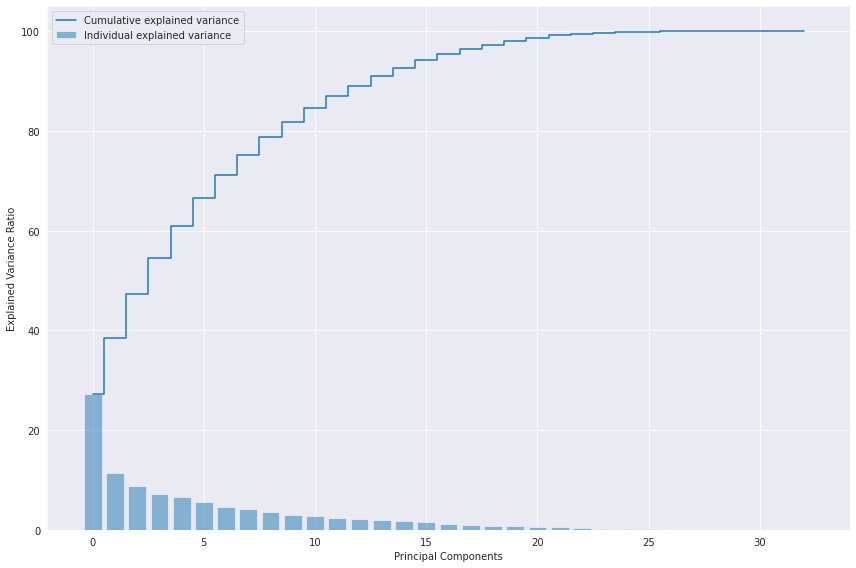

In [19]:
plt.figure(figsize=(12 , 8))
plt.bar(range(33), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(33), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [20]:
eig_pairs = [(eigenvalues[index],eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs

[(8.999061678901514,
  array([-0.17799346, -0.14392141,  0.00906484,  0.00909299,  0.26985036,
          0.24748579,  0.16084327,  0.28324207, -0.20283121,  0.02663275,
         -0.1079412 , -0.13725821,  0.13725821, -0.08474734, -0.1492182 ,
          0.1527441 , -0.04862995,  0.25967103, -0.13781699, -0.24670423,
         -0.07777624,  0.3074332 ,  0.2996139 ,  0.25683961, -0.09032152,
         -0.02436292,  0.25797574, -0.03849346, -0.01891757,  0.25634296,
         -0.05784977, -0.01900061, -0.10394034])),
 (3.7349280154829683,
  array([-0.05186453, -0.03614164,  0.02995436,  0.02993418, -0.02542046,
         -0.03648839, -0.07629344, -0.01214003,  0.18296749,  0.25990196,
         -0.10533451, -0.0715828 ,  0.0715828 , -0.17567382,  0.1035191 ,
          0.00073308,  0.15621401,  0.11236382,  0.33847331, -0.20956013,
         -0.37497393, -0.09494283,  0.10693036, -0.27660404, -0.42694572,
          0.29241045, -0.13624742, -0.19268924, -0.09648108,  0.13291603,
          0.180685

### It is important to arrange the eigen vectors from highest magnitude to lowest

In [21]:
eig_pairs.sort()
eig_pairs.reverse()

In [22]:
eig_value_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eig_vector_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

## since there are 33 features in our dataset, 33 PCs will be formed but we can see that close to 95 variance is explained by first 17 PCs. So, we will select 17 PCs

In [23]:
p_reduce = np.array(eig_vector_sort[0:17]).transpose()
p_reduce.shape

(33, 17)

### Creating PC- Dimension with 17 PCs

In [24]:
proj_data_17d = np.dot(df_scaled,p_reduce)
proj_data_17d.shape

(1941, 17)

### Now we will PC-Dimension for Kmeans Clustering and Compare the results

In [25]:
kmeans_pca = KMeans(n_clusters=2,n_init=15,random_state = 0)
kmeans_pca.fit(proj_data_17d)
df_k_pca = df_scaled.copy()
df_k_pca['label'] = kmeans.labels_

In [26]:
kmeans_pca.inertia_

47658.55935304377

In [27]:
print('Inertia using KMeans clustering Before PCA:',kmeans.inertia_)
print('Inertia using KMeans clustering After PCA:',kmeans_pca.inertia_)

Inertia using KMeans clustering Before PCA: 50595.839508015306
Inertia using KMeans clustering After PCA: 47658.55935304377


## We can see that after PCA the inertia has been reduced. Now If we want we can do model building using PC-Dimensions. Let's do a Comparision on linear model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold

### Using Original dataset

In [29]:
y_train = train['Other_Faults']
X_train = train.drop('Other_Faults',axis = 1)
X_train.shape,y_train.shape

((1941, 33), (1941,))

In [30]:
model = LogisticRegression()
kfold = KFold(n_splits=10,shuffle=True,random_state=42).get_n_splits(train.values)
cv_results = cross_val_score(model,X_train,y_train,cv = kfold,scoring='roc_auc')
print('accuracy_mean:',np.mean(cv_results),'acuracy_std:',np.std(cv_results,ddof =1),sep='\n')

accuracy_mean:
0.5877081609860224
acuracy_std:
0.23406842557399263


### Using PC-Dimension

In [31]:
model = LogisticRegression()
kfold = KFold(n_splits=10,shuffle=True,random_state=42).get_n_splits(train.values)
cv_results = cross_val_score(model,proj_data_17d,y_train,cv = kfold,scoring='roc_auc')
print('accuracy_mean:',np.mean(cv_results),'acuracy_std:',np.std(cv_results,ddof =1),sep='\n')

accuracy_mean:
0.8812133393334612
acuracy_std:
0.14403992685539468


## As we can see both roc score and variance have been improved significantly. So PCA is working wonders for this Dataset